# <center><b>BIỂU ĐỒ SỐ LƯỢNG LƯỢT KHÁM NGOẠI TRÚ CỦA BVNDTP 2019</br>Long An và TP. Hồ Chí Minh</b></center>

In [1]:
import geopandas as gpd
import pandas as pd

## Bản đồ được tải về từ GADM.org

In [2]:
file = "my_data/gadm36_VNM.gpkg"

In [3]:
df = gpd.read_file(file)

In [4]:
df2 = df[df["NAME_1"].isin(["Long An","Hồ Chí Minh"])].loc[:, ["NAME_2","NAME_3","VARNAME_3","TYPE_3","geometry"]]
df2.head()

,NAME_2,NAME_3,VARNAME_3,TYPE_3,geometry
3362,Bình Chánh,An Phú Tây,An Phu Tay,Xã,"MULTIPOLYGON (((106.62373 10.69298, 106.62200 ..."
3363,Bình Chánh,Bình Chánh,Binh Chanh,Xã,"MULTIPOLYGON (((106.55529 10.65239, 106.55594 ..."
3364,Bình Chánh,Bình Hưng,Binh Hung,Xã,"MULTIPOLYGON (((106.69498 10.73614, 106.69355 ..."
3365,Bình Chánh,Bình Lợi,Binh Loi,Xã,"MULTIPOLYGON (((106.51098 10.71797, 106.50935 ..."
3366,Bình Chánh,Đa Phước,Da Phuoc,Xã,"MULTIPOLYGON (((106.68533 10.65673, 106.68575 ..."


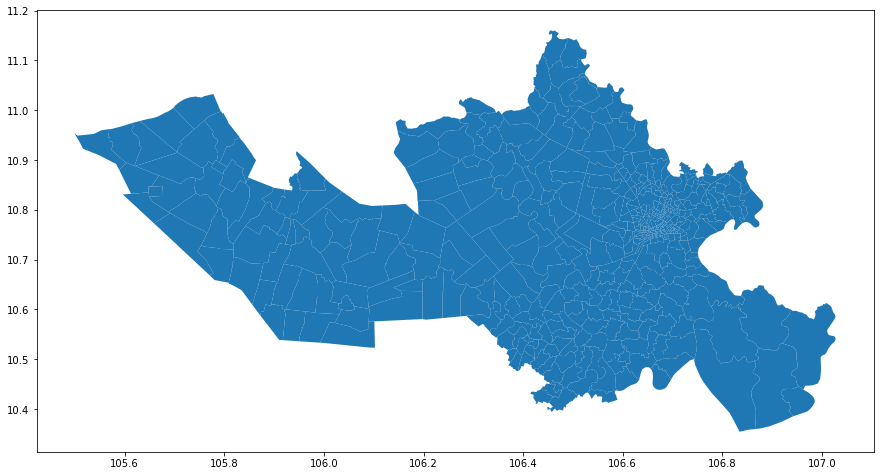

In [46]:
df2.plot(figsize=(15,10));

## Dữ liệu lượt khám

In [9]:
data = pd.read_excel("my_data/final.xlsx",usecols=["TENQUAN","TENTT"])

In [10]:
data = data[data["TENTT"].isin(["TP. Hồ Chí Minh","Tỉnh Long An"])]

In [11]:
data.replace({"Quận Bình Tân":"Bình Tân",
              "Huyện Hóc Môn":"Hóc Môn",
              "Quận Tân Phú":"Tân Phú",
              "Quận Tân Bình":"Tân Bình",
              "Quận Thủ Đức":"Thủ Đức",
              "Huyện Nhà Bè":"Nhà Bè",
              "Thị Xã Kiến Tường":"Kiến Tường",
              "Huyện Đức Hoà":"Đức Hòa"},
            inplace=True)

In [12]:
data = data[data["TENQUAN"]!='Không xác định']
data.head()

,TENQUAN,TENTT
0,Bình Chánh,TP. Hồ Chí Minh
1,Đức Hòa,Tỉnh Long An
2,Bình Tân,TP. Hồ Chí Minh
3,Bình Chánh,TP. Hồ Chí Minh
8,Quận 8,TP. Hồ Chí Minh


In [13]:
df3 = pd.DataFrame(data.groupby("TENQUAN").size().sort_values(ascending=False))

In [14]:
df3.reset_index(inplace=True)

In [15]:
df3.rename(columns={0:"visits"}, inplace=True)

## Lượt khám nhiều nhất đến từ Bình Chánh, Bình Tân

In [16]:
df3

,TENQUAN,visits
0,Bình Chánh,138587
1,Bình Tân,92790
2,Bến Lức,26225
3,Đức Hòa,21238
4,Cần Đước,15312
5,Cần Giuộc,14740
6,Quận 6,9336
7,Quận 8,9127
8,Tân An,6975
9,Tân Phú,6753


In [17]:
final = pd.merge(df2, df3, how='left', left_on="NAME_2", right_on="TENQUAN")

In [18]:
final.head()

,NAME_2,NAME_3,VARNAME_3,TYPE_3,geometry,TENQUAN,visits
0,Bình Chánh,An Phú Tây,An Phu Tay,Xã,"MULTIPOLYGON (((106.62373 10.69298, 106.62200 ...",Bình Chánh,138587.0
1,Bình Chánh,Bình Chánh,Binh Chanh,Xã,"MULTIPOLYGON (((106.55529 10.65239, 106.55594 ...",Bình Chánh,138587.0
2,Bình Chánh,Bình Hưng,Binh Hung,Xã,"MULTIPOLYGON (((106.69498 10.73614, 106.69355 ...",Bình Chánh,138587.0
3,Bình Chánh,Bình Lợi,Binh Loi,Xã,"MULTIPOLYGON (((106.51098 10.71797, 106.50935 ...",Bình Chánh,138587.0
4,Bình Chánh,Đa Phước,Da Phuoc,Xã,"MULTIPOLYGON (((106.68533 10.65673, 106.68575 ...",Bình Chánh,138587.0


In [83]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
greens = cm.get_cmap("Blues", 512)

In [88]:
newgreen = ListedColormap(greens(np.linspace(0.3, 0.9, 256)))

/Volumes/DATA/anaconda3/envs/jupyter/lib/python3.8/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


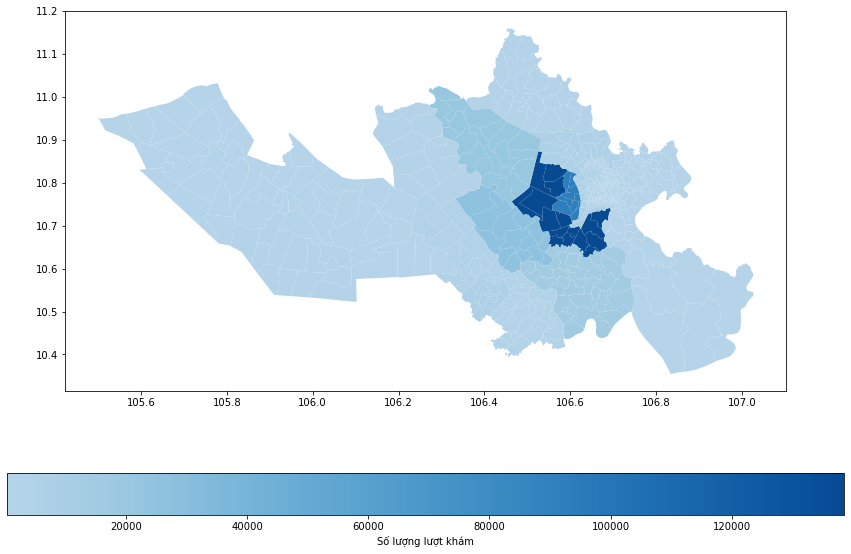

In [89]:
final.plot(figsize=(15,10), column="visits", cmap=newgreen, 
           legend=True, legend_kwds={'label':"Số lượng lượt khám","orientation":"horizontal"});